# This is both in class-practice Lecture 12 and HW#4 which is due at 6:30PM on July 28th 2016!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/spambase.csv"
SpamData = pd.read_csv(url)
SpamData.head()
len(SpamData)

4601

In [3]:
ListOfAllVariables = SpamData.columns.values
X = SpamData[ListOfAllVariables]
del X['is_spam']
y = SpamData['is_spam']

### Earlier in this course, we used logistic regression model and could achieve 8.2% misclassification error. Now, you know few top of the line algorithms like Random Forest and boosting. Go ahead and beat the Logistic regression algorithm. The champion, the person who beats CV-error of 8.2% and makes the least amount of error will receive a ONE DOLLAR bill award! 
### Just beat it, beat it, beat it, beat it
### No one wants to be defeated
### Showin' how funky strong is your fight 
### It doesn't matter who's wrong or right 
### just boost it, bag it, boost it, beat it

If you are using **Boosting** then set **min_samples_leaf = 10** and **random_state = 24**
Also, in order to be consitent use the following way to cross-validate your errors:

kf = cross_validation.KFold(len(BostonData), n_folds = 10, shuffle = True) 

scores = []

for train_index, test_index in kf:

                                  ...
                                  

If you are working with **Random Forest** then set **random_state = 24** and **min_samples_leaf = 10**. 

In [4]:
#Random forest regression problems
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators = 1000,
                          max_features = 4,
                          min_samples_leaf = 10,
                          oob_score = True,
                          random_state = 24)

RF.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=True, random_state=24,
           verbose=0, warm_start=False)

In [5]:
sorted(zip(RF.feature_importances_,X.columns.values))

[(2.6819533733776438e-06, 'word_freq_table'),
 (1.509442364167203e-05, 'word_freq_parts'),
 (0.00018864994107493051, 'word_freq_3d'),
 (0.00029201344596508483, 'word_freq_415'),
 (0.00033263285418325752, 'word_freq_857'),
 (0.00039059952314977317, 'word_freq_direct'),
 (0.00057789243712104074, 'word_freq_cs'),
 (0.00065844343395450719, 'word_freq_report'),
 (0.00075358246838375478, 'word_freq_conference'),
 (0.0007985030916030035, 'word_freq_original'),
 (0.0013629148958540038, 'word_freq_font'),
 (0.0013855001070128803, 'word_freq_project'),
 (0.0016968649098135569, 'word_freq_pm'),
 (0.0017178794622790428, 'word_freq_people'),
 (0.0019398344860728335, 'char_freq_['),
 (0.0020393449198249981, 'word_freq_technology'),
 (0.002146794574123239, 'word_freq_telnet'),
 (0.002180831965277759, 'word_freq_data'),
 (0.0027061080881435212, 'word_freq_make'),
 (0.0028215345840391644, 'word_freq_addresses'),
 (0.0029771262208342884, 'word_freq_lab'),
 (0.0030596699665234048, 'char_freq_;'),
 (0.003

In [6]:
RF.oob_score_

0.76592459360563969

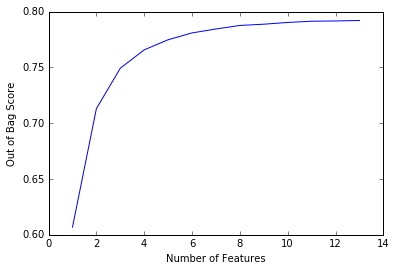

In [7]:
#use OOB error to tune the model
Features = range(1,14)
oob_score_RF = []
for i in Features:
    RF = RandomForestRegressor(n_estimators = 2000,
                              max_features = i,
                              min_samples_leaf = 10,
                              oob_score = True,
                              random_state = 24,
                              n_jobs = -1)
    RF.fit(X,y)
    oob_score_RF.append(RF.oob_score_)
    
plt.plot(Features, oob_score_RF)
plt.xlabel("Number of Features")
plt.ylabel("Out of Bag Score")
plt.show()

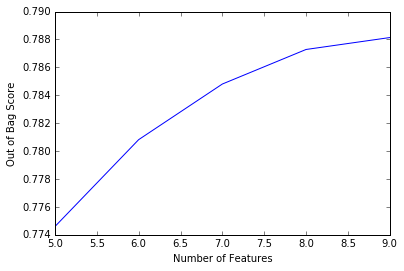

In [8]:
Features = range(5,10)
oob_score_RF = []
for i in Features:
    RF = RandomForestRegressor(n_estimators = 1000,
                              max_features = i,
                              min_samples_leaf = 10,
                              oob_score = True,
                              random_state = 24,
                              n_jobs = -1)
    RF.fit(X,y)
    oob_score_RF.append(RF.oob_score_)
    
plt.plot(Features, oob_score_RF)
plt.xlabel("Number of Features")
plt.ylabel("Out of Bag Score")
plt.show()

In [9]:
RF = RandomForestRegressor(n_estimators = 5000,
                          max_features = 8,
                          min_samples_leaf = 10,
                          oob_score = True,
                          random_state = 24)

RF.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=5000, n_jobs=1, oob_score=True, random_state=24,
           verbose=0, warm_start=False)

In [10]:
RF.oob_score_

0.78760223454992639

In [11]:
#time to do a bit of boosting... I hope... 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import cross_val_score

GBR_Tree = GradientBoostingRegressor(learning_rate = 0.001,
                                    n_estimators = 1000,
                                    max_depth = 2,
                                    min_samples_leaf = 10,
                                    random_state = 24)

score = (-cross_val_score(GBR_Tree, X, y, cv = 10, scoring = 'mean_squared_error',
                          n_jobs = -1)).mean()
print score

0.145926399348


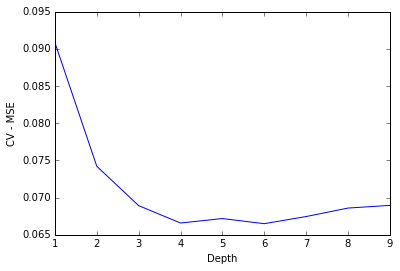

In [12]:
Depth = range(1,10)
Score = []
for i in Depth:
                GBR_Tree = GradientBoostingRegressor(learning_rate = 0.01, # This is lambda, a tuning parameter, usually between 0.01 and 0.1
                                             n_estimators = 1000, #This is B, a tuning parameter, using large B can cause overfitting
                                             max_depth = i, #This is d, another tuning parameter, usually max_depth < 5
                                             min_samples_leaf = 10,
                                             random_state = 1)
        
                Score.append(-cross_val_score(GBR_Tree, X, y, cv=10, scoring='mean_squared_error', n_jobs = -1).mean())

plt.plot(Depth, Score)
plt.xlabel("Depth")
plt.ylabel("CV - MSE")
plt.show()  

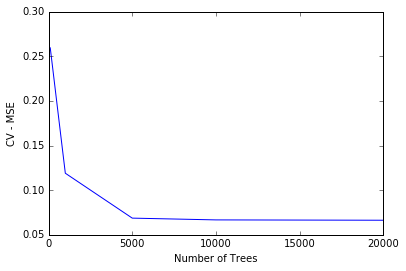

In [14]:
Score = []
NumberOfTrees = [100,1000,5000,10000,20000]
for i in NumberOfTrees:
                GBR_Tree = GradientBoostingRegressor(learning_rate = 0.001, # This is lambda, a tuning parameter, usually between 0.01 and 0.1
                                             n_estimators = i, #This is B, a tuning parameter, using large B can cause overfitting
                                             max_depth = 4, #This is d, another tuning parameter, usually max_depth < 5
                                             min_samples_leaf = 10)
        
                Score.append(-cross_val_score(GBR_Tree, X, y, cv = 10, scoring = 'mean_squared_error', n_jobs = -1).mean())

plt.plot(NumberOfTrees, Score)
plt.xlabel("Number of Trees")
plt.ylabel("CV - MSE")
plt.show() 

In [16]:
Index_Min = np.argmin(Score)
Optimal_tree = NumberOfTrees[Index_Min]
print "Optimal tree = %i, which results in a minimum error of %f" %(Optimal_tree, np.min(Score))

Optimal tree = 20000, which results in a minimum error of 0.066309


Although the optimal tree number of 20,000 gives us the best minimum error, I'd recommend using 5,000 trees instead... the difference between the error at 5,000 and 20,000 doesn't appear to be all that significant, but the time/computing power between these two forests is huge. 